In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from numba import jit
from isingm import *

In [18]:
def mc_ising(steps:int, n,j,T,a_in, skipsteps = 1, frames = 100, annealing = False):

    if annealing and T < 2.269:
        initialTemp = 4
        finalTemp = T

    def TempFuncExp(step):
        return initialTemp * (finalTemp / initialTemp)**(step/steps)
    
    def TempFuncInverse(step):
        alpha = (initialTemp - finalTemp) / (finalTemp * (steps - 1))
        return initialTemp / (1 + alpha * step)
    
    stepSaveFrame = steps/frames

    a = a_in.copy()

    energies = np.empty(steps//skipsteps)
    magnetizations = np.empty(steps//skipsteps)

    E = energy(a,j)
    M = magnetization(a)

    #data = []


    if annealing and T < 2.269:
        for i in range(steps):
            if i % skipsteps == 0:
                energies[i//skipsteps] = E
                magnetizations[i//skipsteps] = M


            
            # if i % stepSaveFrame == 0:
            #     data.append(a.copy())

            x = np.random.randint(0,n)
            y = np.random.randint(0,n)

            b = a.copy()
            b[x,y] *= -1
            
            
            spinChange = b[x,y] - a[x,y]
            dE = -j*(spinChange)*(a[x,(y+1)%n] + a[(x+1)%n,y] + a[x,y-1] + a[x-1,y])
            dM = spinChange

            if dE <= 0 or np.random.rand() <= np.exp(-dE * (TempFuncExp(i)**(-1))):
                E += dE
                M += dM
                a = b.copy()

        return np.arange(steps//skipsteps), energies, magnetizations#, np.array(data)
    else:
        probs = probabilities(j,T)
        for i in range(steps):
            if i % skipsteps == 0:
                energies[i//skipsteps] = E
                magnetizations[i//skipsteps] = M


            
            # if i % stepSaveFrame == 0:
            #     data.append(a.copy())

            x = np.random.randint(0,n)
            y = np.random.randint(0,n)

            b = a.copy()
            b[x,y] *= -1
            
            
            spinChange = b[x,y] - a[x,y]
            dE = -j*(spinChange)*(a[x,(y+1)%n] + a[(x+1)%n,y] + a[x,y-1] + a[x-1,y])
            dM = spinChange

            if dE <= 0 or np.random.rand() <= probs[dE]:
                E += dE
                M += dM
                a = b.copy()

        return np.arange(steps//skipsteps), energies, magnetizations#, np.array(data)

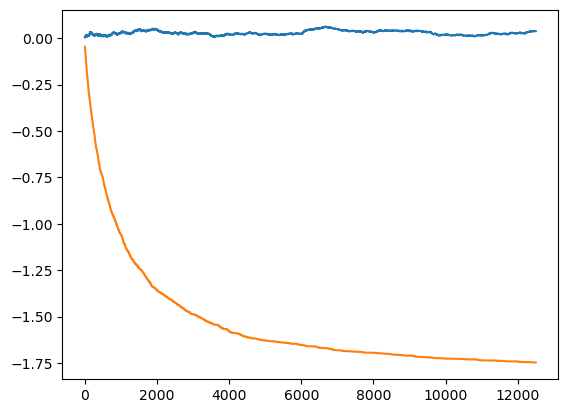

In [11]:
n = 64
a_in = randominitial(n)
steps = 1e5
T = 0.1

step, u, m = mc_ising(int(steps), n, 1, T, a_in, skipsteps= 8, frames = 100, annealing=False)
plt.plot(step, m/n**2)
plt.plot(step, u/n**2)
plt.show()

#animate(a, 'standrad.mp4', 20)

In [7]:
animate(a, 'standrad.mp4', 20)

In [18]:
len(m)

10000000

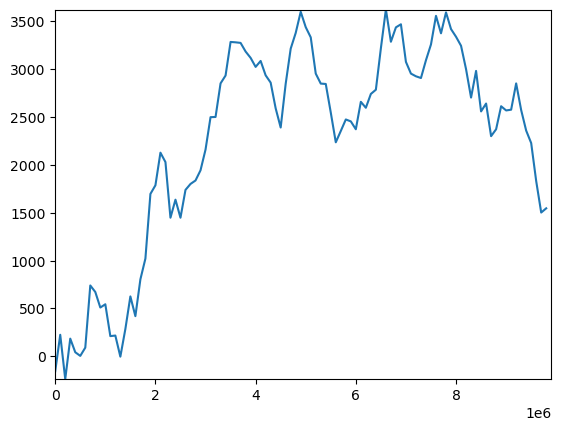

In [20]:
animatePlot(step[::100000], m[::100000], "test.mp4")

In [ ]:
temperatures = [.1,.5, 1.0, 1.5, 1.75, 2.0, 2.1, 2.2,2.3,2.6]
magnetizationAverage = []

for temperature in temperatures:
    n = 64
    a_in = randominitial(n)
    steps = 1e7

    step, u, mag = mc_ising(int(steps), n, 1, temperature, a_in, skipsteps= 1, frames = 1, annealing=True)

    magnetizationAverage.append(np.mean(mag[-1000:]))


TypeError: 'numpy.ndarray' object is not callable